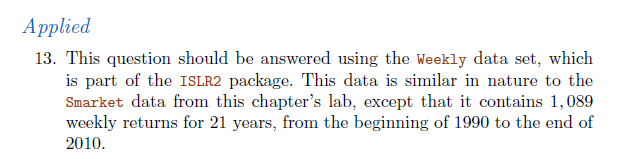

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


weekly = pd.read_csv('data/weekly.csv')
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


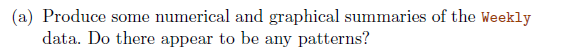

In [61]:
# create direction dummy variable
weekly['Direction'] = np.where(weekly['Direction'] == 'Up', 1, 0)
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [62]:
# create numerical summary
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899,0.555556
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927,0.497132
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000,0.000000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000,0.000000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000,1.000000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000,1.000000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000,1.000000


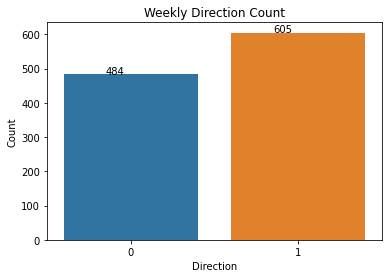

In [63]:
# create countplot of Direction
sns.countplot(x='Direction', data=weekly)
plt.xlabel('Direction')
plt.ylabel('Count')
plt.title('Weekly Direction Count')
for p in plt.gca().patches:
    plt.gca().annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1))
plt.show()


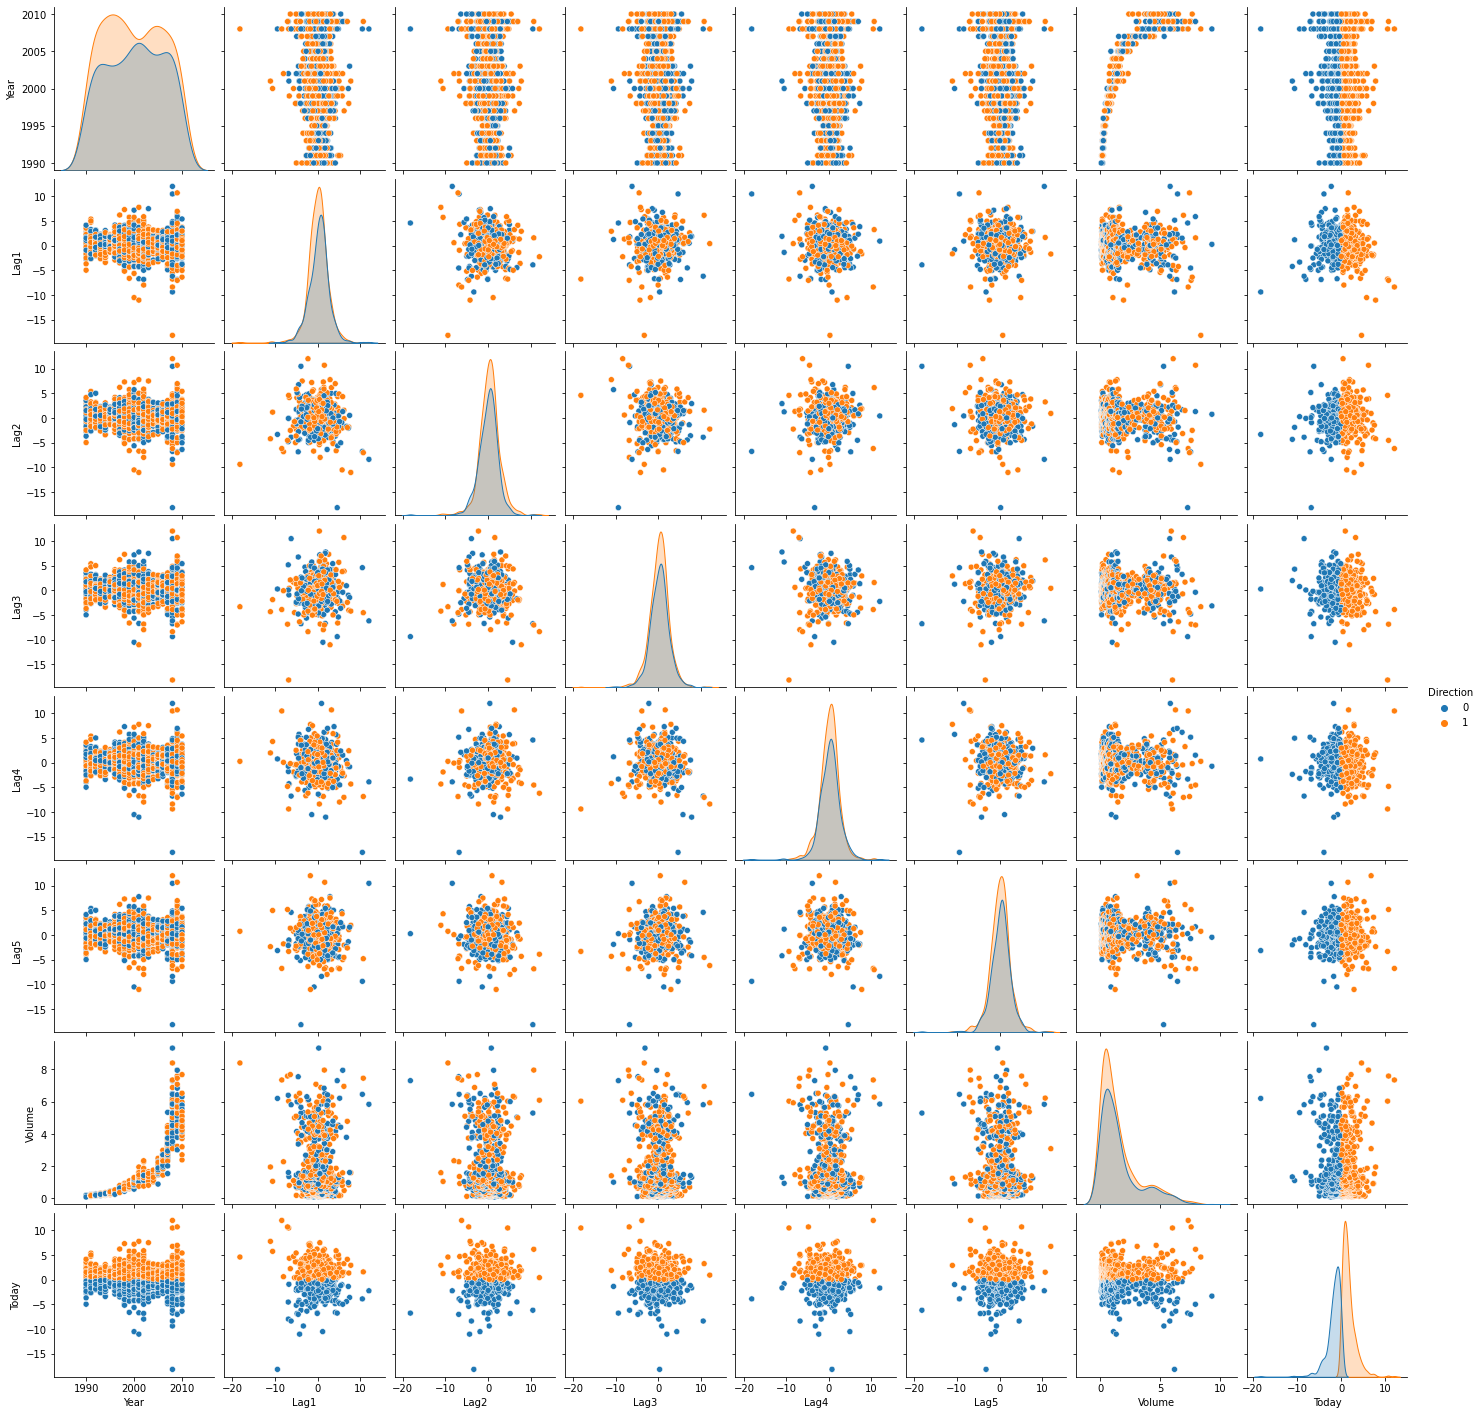

In [64]:
# create seaborn to check variable correlation pairplot
sns.pairplot(weekly, hue='Direction')
plt.show()


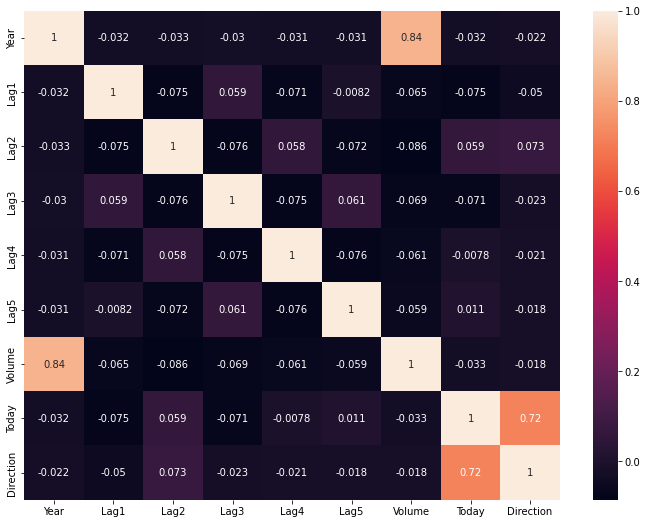

In [68]:
# create correlation matrix 
corr_matrix = weekly.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True)
plt.show()




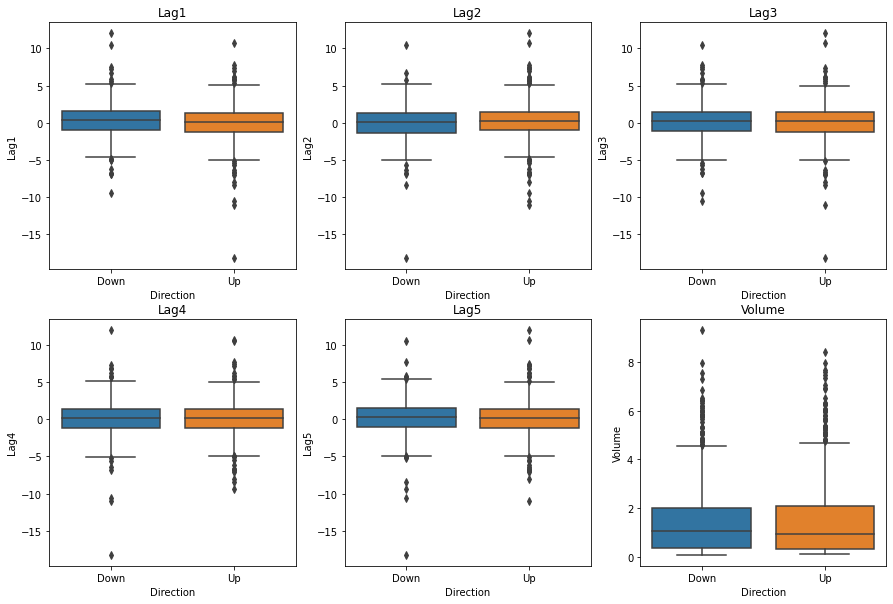

In [33]:
# create 6 subplots 
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(x='Direction', y='Lag1', data=weekly, ax=axes[0, 0])
sns.boxplot(x='Direction', y='Lag2', data=weekly, ax=axes[0, 1])
sns.boxplot(x='Direction', y='Lag3', data=weekly, ax=axes[0, 2])
sns.boxplot(x='Direction', y='Lag4', data=weekly, ax=axes[1, 0])
sns.boxplot(x='Direction', y='Lag5', data=weekly, ax=axes[1, 1])
sns.boxplot(x='Direction', y='Volume', data=weekly, ax=axes[1, 2])
# add title
axes[0, 0].set_title('Lag1')
axes[0, 1].set_title('Lag2')
axes[0, 2].set_title('Lag3')
axes[1, 0].set_title('Lag4')
axes[1, 1].set_title('Lag5')
axes[1, 2].set_title('Volume')
plt.show()


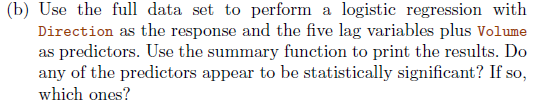

In [75]:
# perform logistic Regression with all varaibles, except for direction, use statmodels
import statsmodels.api as sm
X = weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = weekly['Direction']
X = sm.add_constant(X)
logit_model = sm.Logit(y, X).fit()

display(logit_model.summary())

# extract p-values < 0.05

display(logit_model.pvalues[logit_model.pvalues < 0.05])

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Fri, 28 Apr 2023   Pseudo R-squ.:                0.006580
Time:                        13:30:48   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

const    0.001899
Lag2     0.029601
dtype: float64

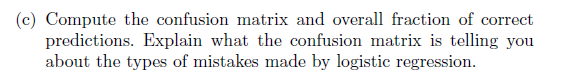

In [84]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [85]:
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]

confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]], dtype=int64)

array([[ 54, 430],
       [ 48, 557]], dtype=int64)

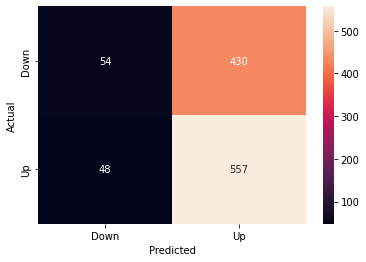

Accuracy: 0.561
Precision: 0.564
Recall: 0.921
F1: 0.700


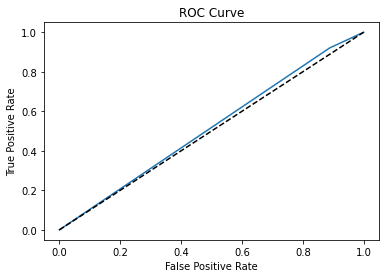

In [86]:
# compute confusion matrix and overall fraction of correct predictions
y_pred = logit_model.predict(X)
y_pred = np.where(y_pred > 0.5, 1, 0)
confusion_matrix(y, y_pred)
# display confusion matrix
display(confusion_matrix(y, y_pred))
# display confusion matrix with its labels 
cm = confusion_matrix(y, y_pred)
df_cm = pd.DataFrame(cm, index=['Down', 'Up'], columns=['Down', 'Up'])
sns.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

log_acc = accuracy_score(y, y_pred)
log_prec = precision_score(y, y_pred)
log_rec = recall_score(y, y_pred)
log_f1 = f1_score(y, y_pred)

print('Accuracy: {:.3f}'.format(log_acc))
print('Precision: {:.3f}'.format(log_prec))
print('Recall: {:.3f}'.format(log_rec))
print('F1: {:.3f}'.format(log_f1))

# plot ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y, y_pred)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


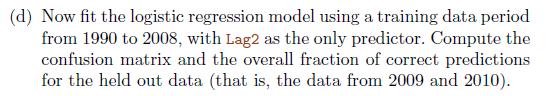

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Fri, 28 Apr 2023   Pseudo R-squ.:                0.003076
Time:                        13:43:12   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.029      2.024      0.043       0.002       0.114
==============================================================================
"""

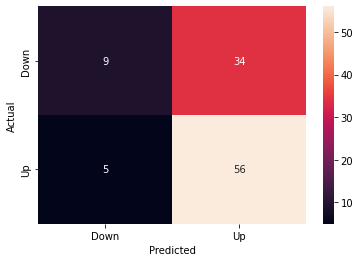

Accuracy: 0.625
Precision: 0.622
Recall: 0.918
F1: 0.742


In [94]:
# fit logistic regression using train an test data
# train data from 1990 to 2008, test data from 2009 to 2010
train = weekly[weekly['Year'] < 2009]
test = weekly[weekly['Year'] >= 2009]

X_train = train['Lag2']
y_train = train['Direction']
X_test = test['Lag2']
y_test = test['Direction']

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

logit_model = sm.Logit(y_train, X_train).fit()
display(logit_model.summary())

# predict test data
y_pred = logit_model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

# compute confusion matrix and overall fraction of correct predictions
confusion_matrix(y_test, y_pred)
# display confusion matrix with its labels
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['Down', 'Up'], columns=['Down', 'Up'])
sns.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

log_acc = accuracy_score(y_test, y_pred)
log_prec = precision_score(y_test, y_pred)
log_rec = recall_score(y_test, y_pred)
log_f1 = f1_score(y_test, y_pred)

print('Accuracy: {:.3f}'.format(log_acc))
print('Precision: {:.3f}'.format(log_prec))
print('Recall: {:.3f}'.format(log_rec))
print('F1: {:.3f}'.format(log_f1))

# repeat instea of logistic regression we use LDA

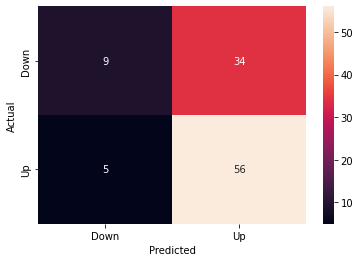

Accuracy: 0.625
Precision: 0.622
Recall: 0.918
F1: 0.742


In [98]:
# repeat with LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

# display confusion matrix with its labels
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['Down', 'Up'], columns=['Down', 'Up'])
sns.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

lda_acc = accuracy_score(y_test, y_pred)
lda_prec = precision_score(y_test, y_pred)
lda_rec = recall_score(y_test, y_pred)
lda_f1 = f1_score(y_test, y_pred)

print('Accuracy: {:.3f}'.format(lda_acc))
print('Precision: {:.3f}'.format(lda_prec))
print('Recall: {:.3f}'.format(lda_rec))
print('F1: {:.3f}'.format(lda_f1))


C:\Users\Ben\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Ben\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:912: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Ben\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:912: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Ben\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:915: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


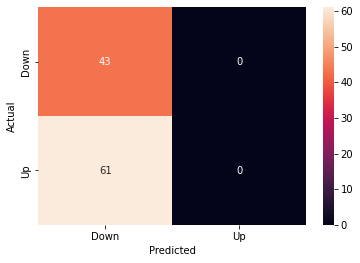

Accuracy: 0.413
Precision: 0.000
Recall: 0.000
F1: 0.000


C:\Users\Ben\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
# repeat with QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred = qda.predict(X_test)

# display confusion matrix with its labels
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['Down', 'Up'], columns=['Down', 'Up'])
sns.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

qda_acc = accuracy_score(y_test, y_pred)
qda_prec = precision_score(y_test, y_pred)
qda_rec = recall_score(y_test, y_pred)
qda_f1 = f1_score(y_test, y_pred)

print('Accuracy: {:.3f}'.format(qda_acc))
print('Precision: {:.3f}'.format(qda_prec))
print('Recall: {:.3f}'.format(qda_rec))
print('F1: {:.3f}'.format(qda_f1))


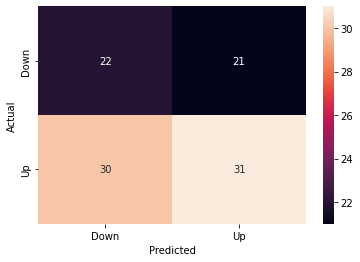

Accuracy: 0.510
Precision: 0.596
Recall: 0.508
F1: 0.549


In [101]:
# repeat with KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# display confusion matrix with its labels
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['Down', 'Up'], columns=['Down', 'Up'])
sns.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

knn_acc = accuracy_score(y_test, y_pred)
knn_prec = precision_score(y_test, y_pred)
knn_rec = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

print('Accuracy: {:.3f}'.format(knn_acc))
print('Precision: {:.3f}'.format(knn_prec))
print('Recall: {:.3f}'.format(knn_rec))
print('F1: {:.3f}'.format(knn_f1))


      Model  Accuracy  Precision    Recall        F1
0  Logistic  0.625000   0.622222  0.918033  0.741722
1       LDA  0.625000   0.622222  0.918033  0.741722
2       QDA  0.413462   0.000000  0.000000  0.000000
3       KNN  0.509615   0.596154  0.508197  0.548673


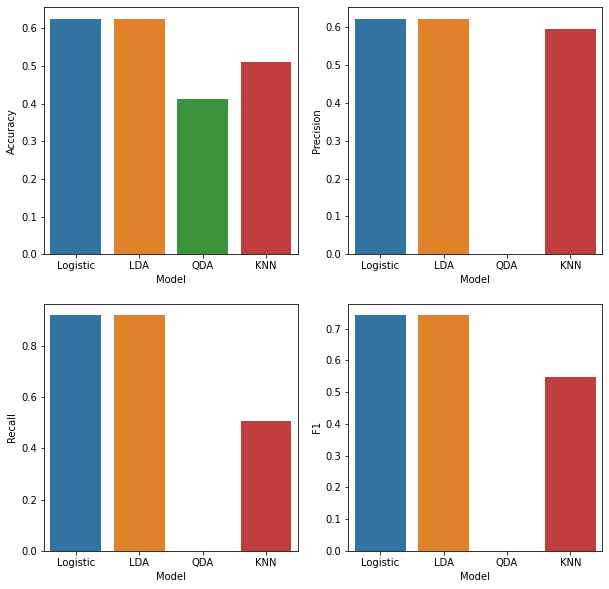

In [104]:
# create table of results
results = pd.DataFrame({'Model': ['Logistic', 'LDA', 'QDA', 'KNN'],
                        'Accuracy': [log_acc, lda_acc, qda_acc, knn_acc],
                        'Precision': [log_prec, lda_prec, qda_prec, knn_prec],
                        'Recall': [log_rec, lda_rec, qda_rec, knn_rec],
                        'F1': [log_f1, lda_f1, qda_f1, knn_f1]})
print(results)

# create 4 barplots for each column in results
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.barplot(x='Model', y='Accuracy', data=results, ax=axes[0, 0])
sns.barplot(x='Model', y='Precision', data=results, ax=axes[0, 1])
sns.barplot(x='Model', y='Recall', data=results, ax=axes[1, 0])
sns.barplot(x='Model', y='F1', data=results, ax=axes[1, 1])
plt.show()
